# Homework 9

### Elevator velocity

In this experiment, I took an elevator in Fronczak Hall. Luckily everyone in the elevator was going from the ground floor to the forth floor. I started the elevator data recorder on phyphox (https://phyphox.org/) as the elevator door closed, we had a smooth trip to the forth floor, and I stopped the recorder after we fully stopped at forth floor. 

From the acceleration versus time data I can see that there is an initial spike in accelearation, then the acceleration drops to zero, then there is another spike in acceleration as we come to a stop. This is quite different from other elevators I've taken before, where the acceleration seems to be more gradual and smooth. The Fronczak Hall elevator always gives one a jerk as it starts or stops. The data made it more apparent. Maybe the Fronczak Hall elevator had a different design, for example I heard it's a hydraulic elevator, but I need to look into how hydraulic elevators work. Or maybe the elevator is Fronczak Hall is just getting old, maybe it was smoother in the past? I don't know. 

But let's look at the acceleration versus time data:


In [1]:
# This is to enable linting, making sure we write our python code in style.
%load_ext pycodestyle_magic
%pycodestyle_on

In [2]:
import matplotlib.pyplot as plt

import numpy as np
import math
import scipy

In [3]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100

In [5]:
# I have written a python code to read the data
# It's called read_phyphox.py
# I had to put the original phyphox data in a txt file first
# Then I use this python code to read the data
from read_phyphox import read_phyphox

In [6]:
x, y = read_phyphox('elevator.txt')

In [7]:
# Let's see if the data is imported
# x should be the time data
x

array([ 0.2519155 ,  0.3018115 ,  0.3517075 ,  0.4016045 ,  0.451479  ,
        0.501406  ,  0.551302  ,  0.601198  ,  0.651094  ,  0.700991  ,
        0.750887  ,  0.800783  ,  0.850679  ,  0.900576  ,  0.950502  ,
        1.000399  ,  1.050295  ,  1.100191  ,  1.150087  ,  1.199984  ,
        1.24988   ,  1.299776  ,  1.349703  ,  1.399599  ,  1.44949675,
        1.49939375,  1.54928975,  1.59918575,  1.64908175,  1.69897875,
        1.74887475,  1.79880175,  1.84869775,  1.89859375,  1.94848975,
        1.99838575,  2.04828275,  2.09817875,  2.14807475,  2.19800175,
        2.24789775,  2.29779375,  2.34769075,  2.39758675,  2.44748275,
        2.49737937,  2.54727638,  2.59717237,  2.64709937,  2.69699538,
        2.74689138,  2.79678738,  2.84668438,  2.89658038,  2.94647638,
        2.99637237,  3.04629937,  3.09619538,  3.14609237,  3.19598838,
        3.24588438,  3.29578038,  3.34567738,  3.39557338,  3.44546938,
        3.495413  ,  3.545309  ,  3.595205  ,  3.645101  ,  3.69

In [8]:
# y should be the acceleration data
y

array([ 1.31646650e-01,  8.75597200e-03, -3.44402170e-02, -2.52515520e-02,
       -1.57573691e-01,  6.77046760e-02, -6.22951830e-02,  2.36921460e-01,
        4.30408165e-01, -2.40980363e-01, -5.10031221e-01, -1.36141424e-01,
       -3.24336870e-02, -8.21505730e-02,  1.40213776e-01, -1.37891729e-01,
        2.94034957e-01,  1.85387609e-01, -2.54783885e-01, -2.75115000e-02,
       -3.23828392e-01, -2.65888800e-01, -3.33770062e-01, -1.18895061e-01,
       -1.45903467e-01, -5.21880370e-02, -7.68947450e-02,  6.08841330e-02,
        1.42474192e-01, -2.32239710e-02, -1.72216405e-01, -2.17631379e-01,
       -3.67271800e-02,  3.84447410e-02,  3.19993550e-02, -1.36791166e-01,
       -1.52651739e-01,  9.30893100e-02,  4.08999870e-02, -9.55666590e-02,
       -6.92858800e-02, -1.70256068e-01, -1.55062195e-01, -4.90504210e-02,
       -9.01593880e-02, -1.65878490e-02, -3.09265080e-02, -2.40041070e-02,
       -2.75498580e-02, -7.85429580e-02, -2.09665950e-02,  3.76304580e-02,
        9.32520970e-02,  

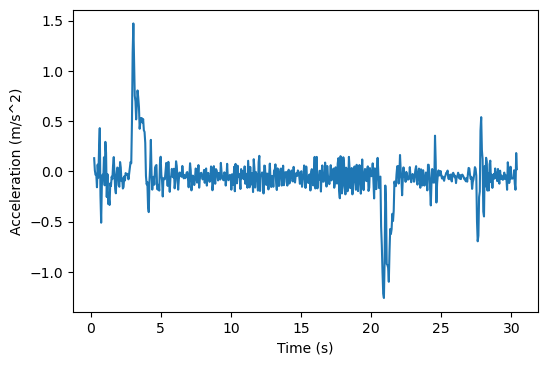

In [9]:
f1 = plt.figure(1)
plt.plot(x, y)
plt.ylabel('Acceleration (m/s^2)')
plt.xlabel('Time (s)')
plt.show()

The data is imported correctly. From the data, we can see two prominent spikes. They correpond to the "jerks" I felt when the elevator started and when it stopped. The initial spike is a large positive acceleration, corresponding to the elevator picking up speed. The second spike around t = 21s is a large negative acceleration, corresponding to the elevator coming to a stop. There is also some vibration in the elevator. Just before the elevator comes to a full stop, there is a big vibration around t = 28s. 

From this data, let's look at how the velocity of the elevator changes with time. To do so, we need to integrate, since velocity is the time integral of acceleration.

Here is a little catch, we had an integration tool from this course that helps us integrate a well defined function like y = x^2, but we do not have a tool that does integration on a set of data. Luckily we can use an integration tool in scipy. https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.cumulative_trapezoid.html

In [10]:
from scipy import integrate

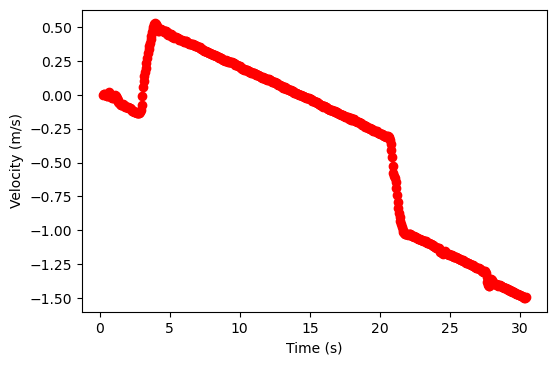

In [11]:

y_int = integrate.cumtrapz(y, x, initial=0)
plt.plot(x, y_int, 'ro')
plt.ylabel('Velocity (m/s)')
plt.xlabel('Time (s)')
plt.show()

This is a little weird... we expect the velocity should be positive all the time... We were definitely not going downward. And phyphox data also shows velocity being positive throughout the trip. So there must be something wrong. Also, the positive velocity is too small. It is as if the whole graph is skewed somehow. I tried a different set of x values, and it is the same graph:

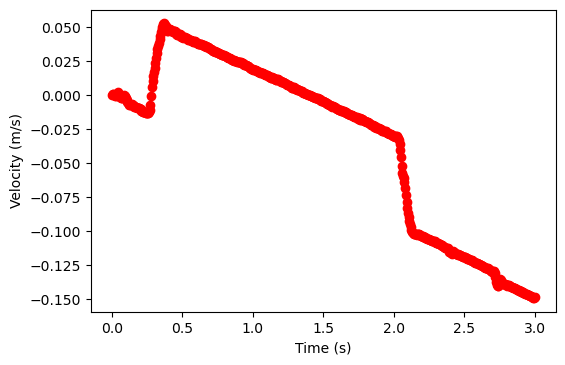

In [12]:
t = np.linspace(0, 3, num=605)
y_int = integrate.cumtrapz(y, t, initial=0)
plt.plot(t, y_int, 'ro')
plt.ylabel('Velocity (m/s)')
plt.xlabel('Time (s)')
plt.show()

I don't know how to fix that... something is wrong.


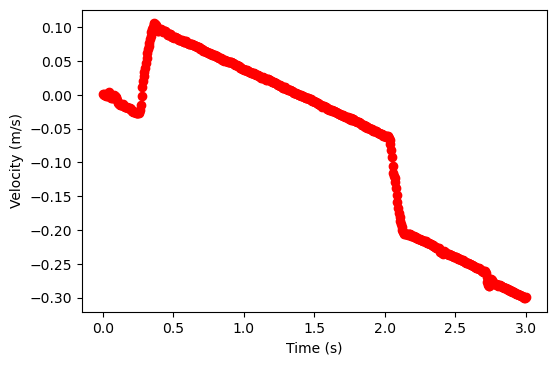

In [30]:
z = np.linspace(0, 3, num=604)
plt.plot(z, y_int2, 'ro')
plt.ylabel('Velocity (m/s)')
plt.xlabel('Time (s)')
plt.show()